In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import h5py as hdf
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
def gather_universal(path: str,filetype: str)-> list:
    subdir=path

    data=[]
    for path, subdirs, files in os.walk(subdir):
        for name in files:
            if name.endswith(filetype) and name[-5]!='t'  :

                b=(str(os.path.join(path, name)))
                data.append(b)
    return data
def sort_on_last(list:list)->list:
    df=pd.DataFrame({'list': list})
    df['nums']=df['list'].apply(lambda x:x.split('_')[-1].split('.')[0])
    df['nums']=df.nums.astype(int)
    df.sort_values(by='nums',inplace=True)
    #display(df)
    return(np.array(df['list']))
path='data/hdf/'
display(gather_universal(path,'.hdf5'))

def get_hdf_main_groups(path) -> list:
    with hdf.File(path,'r') as r:
        #display([str(i) for i in r.keys()])
        return [str(i) for i in r.keys()]

def get_hdf_group_datasets(path,groupkey) -> list:
    with hdf.File(path,'r') as r:
        #display([str(i) for i in r[groupkey].keys()])
        return [str(i) for i in r[groupkey].keys()]

def get_df_columns(path)-> pd.DataFrame:
    groups=get_hdf_main_groups(path)
    cols=[]
    for key in groups:
       cols=cols+ list(zip(list(np.full(len(get_hdf_group_datasets(path,key)),key)),
                 get_hdf_group_datasets(path,key)))

    #display(cols)
    columns=pd.MultiIndex.from_tuples(cols, names=('group', 'dataset'))
    #display(pd.DataFrame(columns=columns))
    return columns
def zero_to_nan(array):
    array[array==0.]=np.nan
    return(array)
def steps_to_df(seriespath,examplefilepath)->pd.DataFrame:
    path=seriespath
    series=pd.DataFrame(index=sort_on_last(gather_universal(path,'.hdf5')),columns=get_df_columns(examplefilepath))

    for file in series.index:
        with hdf.File(str(file),'r') as r:
            for location in series.columns:
                series.loc[file,location]=r[location[0]][location[1]][:]
    return series
series=steps_to_df('Y:\Istra Repositories\ch-gr_exports\MC_A_8yi','data/hdf/series_step_115.hdf5')

['data/hdf/series_step_104.hdf5',
 'data/hdf/series_step_105.hdf5',
 'data/hdf/series_step_106.hdf5',
 'data/hdf/series_step_113.hdf5',
 'data/hdf/series_step_114.hdf5',
 'data/hdf/series_step_115.hdf5',
 'data/hdf/series_step_122.hdf5',
 'data/hdf/series_step_123.hdf5',
 'data/hdf/series_step_124.hdf5',
 'data/hdf/series_step_131.hdf5']

In [3]:
#plt.matshow(series.loc['data/hdf/series_step_122.hdf5',('strains','strain_p1')])

In [4]:
display([i for i in series.index])
display([i for i in series.columns])

['Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_0.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_1.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_2.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_3.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_4.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_5.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_6.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_7.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_8.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_9.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_10.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_11.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_step_12.hdf5',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi\\series_ste

[('add_data', 'analog_channels'),
 ('coordinates', 'coordinate_x'),
 ('coordinates', 'coordinate_x_var'),
 ('coordinates', 'coordinate_y'),
 ('coordinates', 'coordinate_y_var'),
 ('coordinates', 'coordinate_z'),
 ('coordinates', 'coordinate_z_var'),
 ('coordinates', 'distance_to_plane'),
 ('coordinates', 'distance_to_sphere'),
 ('coordinates', 'mask'),
 ('coordinates', 'variance_sphere'),
 ('displacements', 'displacement_total'),
 ('displacements', 'displacement_total_rbmr'),
 ('displacements', 'displacement_total_rbmr_var'),
 ('displacements', 'displacement_total_var'),
 ('displacements', 'displacement_x'),
 ('displacements', 'displacement_x_rbmr'),
 ('displacements', 'displacement_x_var'),
 ('displacements', 'displacement_y'),
 ('displacements', 'displacement_y_rbmr'),
 ('displacements', 'displacement_y_var'),
 ('displacements', 'displacement_z'),
 ('displacements', 'displacement_z_rbmr'),
 ('displacements', 'displacement_z_var'),
 ('displacements', 'mask'),
 ('strains', 'engineering

In [5]:
#display(series.loc['data/hdf/series_step_122.hdf5',('strains','strain_p1')])

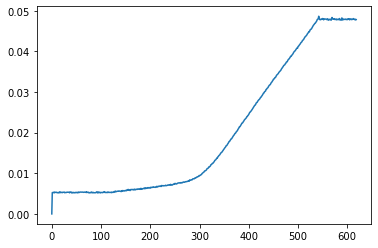

In [6]:
#plt.matshow(zero_to_nan(series.loc['data/hdf/series_step_122.hdf5',('strains','strain_p1')]))
plt.plot([np.nanmean(zero_to_nan(i)) for i in series.loc[:,('strains', 'strain_p1')]])
#plt.plot([np.nanmean(zero_to_nan(i)) for i in series.loc[:,('add_data', 'analog_channels')]])

In [7]:
display(series)
display([f[1] for f in series.columns if f[0]=='strains'])

group                                                               add_data  \
dataset                                                      analog_channels   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.17803990460911756]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.17902631506994415]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.18067033250412906]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.18231434993765888]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...   [[-0.1846159743435059]]   
...                                                                      ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.15173562556412296]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.15239323254240295]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.15305083952057003]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.15370844649862436]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[-0.15403724998760931]]   

group                                                                                     coordinates  \
dataset                                                                                  coordinate_x   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                              coordinate_x_var   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
Y:\Istra Repositories\ch-gr_exports\MC_A_8yi\se...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                                  coordinate_y   
Y:\Istra Reposito

['engineering_strain_mask',
 'engineering_strain_p1',
 'engineering_strain_p1_var',
 'engineering_strain_p2',
 'engineering_strain_p2_var',
 'engineering_strain_xx',
 'engineering_strain_xx_var',
 'engineering_strain_xy',
 'engineering_strain_xy_var',
 'engineering_strain_yy',
 'engineering_strain_yy_var',
 'mask',
 'strain_p1',
 'strain_p1_var',
 'strain_p2',
 'strain_p2_var',
 'strain_xx',
 'strain_xx_var',
 'strain_xy',
 'strain_xy_var',
 'strain_yy',
 'strain_yy_var',
 'true_strain_mask',
 'true_strain_p1',
 'true_strain_p1_var',
 'true_strain_p2',
 'true_strain_p2_var',
 'true_strain_xx',
 'true_strain_xx_var',
 'true_strain_xy',
 'true_strain_xy_var',
 'true_strain_yy',
 'true_strain_yy_var']

In [8]:
display(series.columns)

MultiIndex([(     'add_data',             'analog_channels'),
            (  'coordinates',                'coordinate_x'),
            (  'coordinates',            'coordinate_x_var'),
            (  'coordinates',                'coordinate_y'),
            (  'coordinates',            'coordinate_y_var'),
            (  'coordinates',                'coordinate_z'),
            (  'coordinates',            'coordinate_z_var'),
            (  'coordinates',           'distance_to_plane'),
            (  'coordinates',          'distance_to_sphere'),
            (  'coordinates',                        'mask'),
            (  'coordinates',             'variance_sphere'),
            ('displacements',          'displacement_total'),
            ('displacements',     'displacement_total_rbmr'),
            ('displacements', 'displacement_total_rbmr_var'),
            ('displacements',      'displacement_total_var'),
            ('displacements',              'displacement_x'),
        

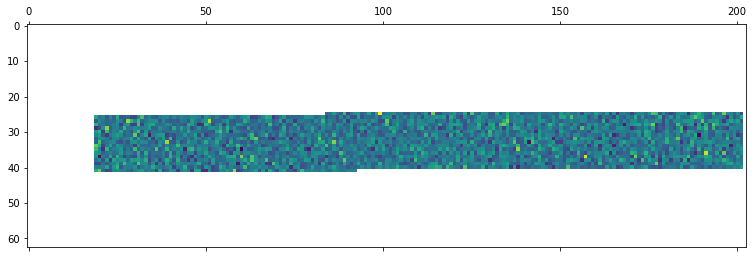

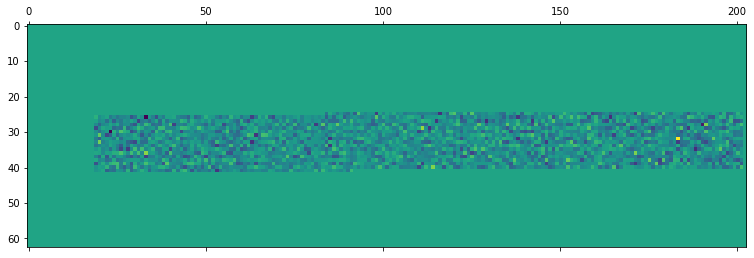

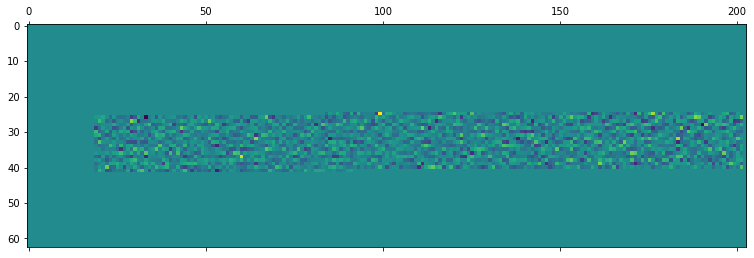

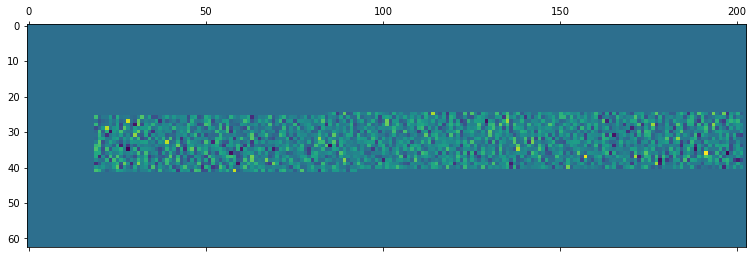

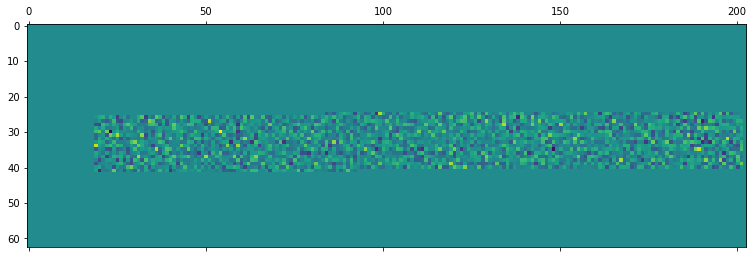

In [9]:
step=250
plt.matshow(series.iloc[step,:][('strains','strain_p1')])
plt.matshow(series.iloc[step,:][('strains','strain_p2')])
plt.matshow(series.iloc[step,:][('strains','strain_xx')])
plt.matshow(series.iloc[step,:][('strains','strain_yy')])
plt.matshow(series.iloc[step,:][('strains','strain_xy')])

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -2.9275709e-29,  2.2403180e-28, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.2894328e-28, -9.6846042e-28, ...,
         4.9212066e-19, -2.6160075e-18,  0.0000000e+00],
       ...,
       [ 0.0000000e+00, -7.2439340e-27,  3.5380251e-26, ...,
         6.6066435e-15,  1.8344553e-15,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.6441030e-15, -4.1494781e-16,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

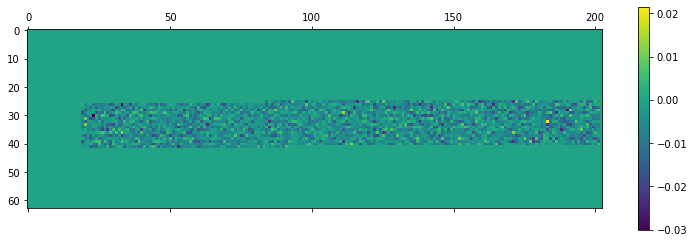

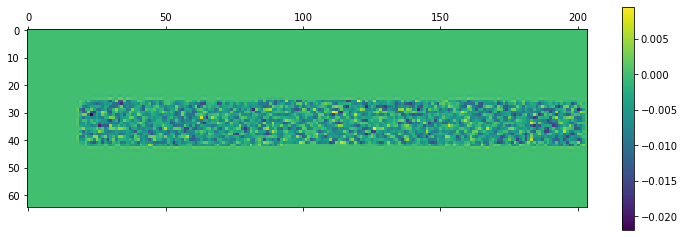

In [10]:
from scipy import ndimage as ndi
before=series.iloc[step,:][('strains','strain_p2')]
after=ndi.rotate(series.iloc[step,:][('strains','strain_p2')],-0.5,reshape=True)
display(after)
bf=plt.matshow(before)
plt.colorbar(bf)
af=plt.matshow(after)
plt.colorbar(af)

In [11]:
array=series.iloc[250,:][('displacements',         'displacement_y_rbmr')]
def strip_background(array):
    #before=array
    #bf=plt.matshow(before)
    #plt.colorbar(bf)

    after=array.copy()
    after[after==0.]=np.nan
    after=pd.DataFrame(after)
    after.dropna(how='all',axis=0,inplace=True)
    after.dropna(how='all',axis=1,inplace=True)
    #display(after)
    """af=plt.matshow(after.dropna(how='all',axis=0))
    plt.colorbar(af)"""
    return(after)
after=strip_background(array)

In [12]:
def get_width(df,col):
    return(len(df.iloc[:,col].dropna(axis=0)))
#display(get_width(after,-1))

def get_start_idx(df,col):
    return df.iloc[:,col].dropna(axis=0).index[0]
#display(get_start_idx(after,-1))

def create_line(p1,p2):
    deltax=abs(p2[1]-p1[1])
    deltay=p2[0]-p1[0]
    m=deltay/deltax
    t=p1[0]-m*p1[1]
    return({i:int(round(i*m+t,0)) for i in range(p1[1],p2[1]+1)})
def linestripe_df(after):
    resdf=pd.DataFrame(columns=after.columns,index=range(get_width(after,0)))

    for linenumber in range(get_width(after,0)):
        p1=(get_start_idx(after,0)+linenumber,after.columns[0])
        p2=(get_start_idx(after,-1)+linenumber,after.columns[-1])
        #display(p1,p2)
        line=create_line(p1,p2)
        for key, value in line.items():
            resdf.loc[linenumber,key]=after.loc[value,key].astype(float)
    #display(resdf[:])
    for i in resdf.columns:
        resdf[i]=resdf[i].astype(float)
    #plt.matshow(after)
    """plt.matshow(resdf)
    plt.show(    )"""
    return(resdf)
linestripe_df(after)

,19,20,21,22,23,24,25,26,27,28,...,192,193,194,195,196,197,198,199,200,201
0,0.165626,0.162756,0.166650,0.162151,0.159390,0.163501,0.156536,0.153373,0.153784,0.151692,...,-0.149886,-0.149566,-0.153076,-0.153736,-0.157856,-0.159779,-0.159456,-0.160452,-0.163979,-0.165476
1,0.163422,0.164912,0.168894,0.162016,0.160847,0.162196,0.155322,0.154735,0.156252,0.151378,...,-0.149395,-0.150884,-0.151329,-0.154870,-0.159007,-0.159418,-0.160945,-0.160408,-0.163011,-0.161782
2,0.167003,0.165168,0.169323,0.162660,0.162656,0.162392,0.154713,0.158633,0.156466,0.146700,...,-0.150665,-0.150797,-0.153025,-0.156711,-0.156997,-0.157807,-0.160785,-0.161590,-0.165114,-0.164654
3,0.168997,0.165608,0.165995,0.162875,0.158065,0.160008,0.154584,0.158017,0.155766,0.148571,...,-0.147313,-0.151188,-0.153318,-0.155857,-0.155650,-0.158006,-0.161293,-0.162187,-0.164213,-0.165919
4,0.168102,0.167525,0.165044,0.160568,0.161080,0.162618,0.160691,0.157961,0.154780,0.150311,...,-0.147452,-0.150323,-0.153100,-0.156451,-0.157211,-0.159024,-0.160334,-0.162087,-0.164707,-0.165342
5,0.166387,0.164774,0.163751,0.160905,0.159679,0.156345,0.155608,0.154046,0.152681,0.150919,...,-0.149298,-0.149714,-0.152309,-0.155143,-0.157161,-0.157621,-0.161175,-0.161746,-0.165018,-0.165341
6,0.171845,0.167613,0.165978,0.159321,0.157388,0.159575,0.152916,0.154173,0.153183,0.150433,...,-0.148498,-0.151406,-0.151797,-0.155176,-0.156611,-0.158405,-0.161651,-0.163481,-0.165403,-0.165806
7,0.167711,0.166254,0.166476,0.162388,0.161595,0.160518,0.149901,0.156123,0.153585,0.148549,...,-0.148618,-0.151455,-0.153513,-0.154734,-0.156503,-0.157845,-0.160107,-0.163458,-0.165271,-0.166705
8,0.166364,0.162659,0.165619,0.160861,0.159363,0.161230,0.153239,0.154884,0.157199,0.148388,...,-0.148162,-0.152015,-0.154056,-0.156791,-0.156944,-0.162019,-0.165243,-0.164352,-0.165355,-0.166822
9,0.165642,0.162067,0.165297,0.158039,0.159182,0.159848,0.154540,0.152680,0.152922,0.147094,...,-0.147600,-0.151275,-0.152059,-0.154379,-0.157453,-0.160209,-0.162695,-0.163613,-0.165045,-0.165777


82.32662845048199

82.33005628026285

82.32878792663068

82.32761332695374

82.32901105289235

82.32895329570673

82.33058508399026

82.32661962818767

82.32945073626547

82.32688615345324

82.32846741629601

82.3286317104098

82.32972673427766

82.32983029421526

82.32832066381546

82.32758989226824

82.3283830542992

82.32831938817682

82.33037595149813

82.32865139185736

82.33056790436063

82.3269657241143

82.33037127757302

82.33086630418903

82.32815094641006

82.32872172232322

82.32608009732064

82.32721792175188

82.33131390738404

82.32954375731623

82.32884424774085

82.32943202993525

82.33006015511893

82.32791228798826

82.32435965240143

82.32637362558248

82.32970126433449

82.3302469076005

82.32717275943642

82.32997408550924

82.32864567518607

82.32973402179469

82.3294202772276

82.33037640243954

82.32845059438256

82.32947365870888

82.32781834706977

82.32975153823593

82.32807972591058

82.32879100536587

82.32862452858343

82.32854317002926

82.33177481894059

82.32856022895638

82.32792694360818

82.32612502785479

82.32768748558168

82.32899564448948

82.32845967159092

82.32742353133347

82.32883158815463

82.33051661972286

82.32959135219286

82.32676189395917

82.33030162187555

82.32569942190145

82.32918445686823

82.32878992734467

82.32850632286787

82.32590991928492

82.3282059298754

82.33020266473503

82.32999603503825

82.32829627183614

82.33280450785142

82.32988707841793

82.32884275782332

82.32728502142078

82.32704236770763

82.32886521243704

82.32769800859629

82.32775495305533

82.32782647848693

82.32743119541365

82.32810878776068

82.33140688719648

82.32947049872925

82.32767487881353

82.32799591010054

82.32913804505691

82.32791705131507

82.32973661992432

82.32804386997978

82.32478765506686

82.33424255746081

82.32873131726973

82.33015680699705

82.3279914840686

82.3321703143558

82.3279695167501

82.32839641575916

82.3288147760721

82.32948032990276

82.32790563729668

82.32880598198051

82.32976602121025

82.32754024369574

82.32924041708449

82.33022054313756

82.32915930873702

82.3299385881524

82.32690735396491

82.32724718421048

82.32624040940638

82.32928945452271

82.32800670745168

82.32760911251182

82.3260459824856

82.32877180527598

82.3300460712023

82.33192010182873

82.33065433537632

82.3314812015166

82.33547537086133

81.88907591478153

81.88995651509586

81.89270466291701

81.89493126435983

81.89776768411241

81.89891859786002

81.89995852466498

81.90415733475713

81.90582257545307

81.91080414212828

81.91441067621294

81.91673362754348

81.91714540753625

81.91941185627138

81.92267208525215

81.92950572982105

81.93008423564979

81.92851013478449

81.93144011452972

81.93555544542845

81.93498067815287

81.93951989213689

81.94290342191208

81.94370508341423

81.94870132104997

81.94789126556216

81.95144458772539

81.95121384187121

81.95857315585683

81.95716417345493

81.95768265141504

81.96102362074609

81.96697826158396

81.96417325918586

81.97181995962487

81.97206418240137

81.97382543295475

81.97378784471991

81.97755531347343

81.98156063896099

81.98536028222432

81.98479223928933

81.98653378494703

81.98823593133993

81.99509491707178

81.99718324201872

81.9957529503346

81.99950652087591

81.99932454469061

82.00251498911705

81.55308183220463

81.55659375766115

81.55784032068124

81.56063197334596

81.56544980329497

81.56444502355586

81.56918056303172

81.56927100098508

81.57687274727384

81.57937447346738

81.57867919641521

81.57732896052067

81.57963902052924

81.58377793422177

81.58761771236475

81.58968222631593

81.59279521328693

81.59716563335633

81.59840667335297

81.59697408783583

81.6031761546752

81.60579070619438

81.60827831615174

81.60908540281669

81.6110397567941

81.61687444721744

81.61726692138589

81.61914138812418

81.62266140697452

81.620916461278

81.6256075846288

81.6319631656577

81.63252172041103

81.63598629001075

81.63979437670622

81.63529130375466

81.64390836610089

81.64340806290065

81.64758116995729

81.6548333935086

81.65566449301228

81.65194930220329

81.6567020791347

81.65762028722753

81.66317943645494

81.66758661902797

81.66838631482872

81.66943496352137

81.81941161625403

81.22071692168723

81.22584076488972

81.22688558100768

81.23000799468069

81.23221346939047

81.23568787455457

81.2372065412151

81.23459332837852

81.2436214017165

81.2446462728787

81.24792511117928

81.24465268584424

81.24945732494209

81.25736899381108

81.25595105551099

81.26064644314147

81.26361285163387

81.26418687236688

81.26662097757294

81.26546412719263

81.26941991591187

81.27743533795973

81.28081742548193

81.28247198873663

81.28327086654696

81.28568618694823

81.28970387199684

81.29086636323811

81.2945465219747

81.29854561851317

81.29944091789551

81.30320965364893

81.30455588608217

81.30925528375643

81.313067895465

81.31477665099402

81.31954778920283

81.31772156106528

81.32113249404446

81.33036157632174

81.32955326107248

81.33428379704286

81.33639202272192

81.33956219896251

81.34335529366246

81.37435382274262

81.37401505747805

81.37900446304906

81.38603125316303

81.47857531285

80.90713568300515

80.91115959641698

80.91871740401643

80.92451342697576

80.92577225164658

80.92933915019626

80.92989295712782

80.93447845086264

80.94016798713955

80.94984253936966

80.95407436087052

80.95918442736006

80.96135597015773

80.96887188635762

80.97472955403744

80.97627853647646

80.98411250518114

80.9910239111405

80.99523741406912

81.00550298861978

81.00967293538292

81.02180063952011

81.02719375739076

81.03400970114046

81.04457097082931

81.04993642726973

81.05855885889922

81.06613665096793

81.07741927732019

81.0881352407298

81.09586322878084

81.10713393700917

81.1160190212724

81.1304036868473

81.13407535834449

81.14749192266947

81.15918292248477

81.17223188378551

81.1796536037942

81.19347573944253

80.74852308461908

80.75924919443278

80.76928974316112

80.78263084935429

80.79420842282083

80.80616397840318

80.81846092855596

80.8322578190371

80.84333968425068

80.85550035332672

80.869296635117

80.8827191835521

80.89525647329376

80.90998866898485

80.92185831443555

80.93188987220728

80.9452320504887

80.9594411257089

80.9713650281055

80.98634755584354

80.99699365281383

81.01021093921649

81.02610213292763

81.0380023181223

81.04974030152808

81.0681437734904

81.07980013847508

81.09111546573087

81.10582383517313

81.12133680236911

81.13517614246805

81.51541955765964

80.7042924322962

80.71820284370833

80.73527110659509

80.74491646478053

80.7608179401485

80.7755666244233

80.78877616893172

80.80132561210947

80.82034966947123

80.83229307825911

80.84543063928905

80.85940254179877

80.87452412181378

80.88869884759755

80.9009594504027

80.91573863463782

80.93259048591224

80.94576473972432

80.95832980766488

80.97663628196939

80.98809625345169

81.00405774253136

81.01528328526966

81.03056364602796

81.04679605307611

81.05756261684866

81.07151483952255

81.0905448276762

81.10605928559534

80.66009768934065

80.67092251491192

80.68544143631547

80.70050236500299

80.7146811104138

80.72862698284489

80.74383611969017

80.75637985053346

80.77382427188108

80.78392929433326

80.79638113436911

80.81173348219312

80.83144622653333

80.83783840568803

80.84993288181877

80.86662643811962

80.88178495138541

80.89475368264982

80.90707998491078

80.92057993482305

80.93520784149655

80.94970234301658

80.96430412420757

80.97550374615597

80.98668971017192

81.00336739297435

81.01801009889883

81.02985592695006

81.04148885056651

81.147582729168

81.16371022399797

80.63025220422804

80.6426560274275

80.65955516095076

80.6717877597622

80.6821334143025

80.69755707630611

80.71309672287495

80.72828247190824

80.74113742007762

80.75153917465187

80.7653993121742

80.78121044438774

80.78801104111321

80.80584124209479

80.82056066923985

80.83127992458739

80.84191875646161

80.85927387145799

80.8717045988342

80.88384612662549

80.89657032926496

80.91241310282952

80.92433739257852

80.93667491779013

80.94970604526314

80.96310725106335

80.97606354007209

80.98931085393312

81.0016846656392

81.01531003324166

81.02994857435516

81.13104795931469

80.5888092374625

80.60281620272204

80.61554221995061

80.6313641215499

80.64173770342097

80.65478120405129

80.66720155880186

80.68013762526577

80.69300938322303

80.70692293691634

80.71680111524557

80.7330802521017

80.7439513920832

80.75444879333706

80.771992072136

80.78250797562968

80.79749151602701

80.8089633816068

80.82312499566754

80.83251848579303

80.84636233775626

80.85635012183742

80.86973210244507

80.88091904782405

80.8950730271228

80.90562099137867

80.91955638915725

80.93061443219452

80.94497615785853

80.9561013663306

80.99873525241497

81.0109951001235

81.02078276428507

80.5386508374329

80.54995031728555

80.56224141610087

80.57203433468388

80.58381940525081

80.59733803629706

80.61064156587597

80.62447955776099

80.63665975285377

80.6447511654655

80.66030440484337

80.67107190356967

80.68235267278556

80.69734980622601

80.70590638817922

80.72015855353803

80.73176867480049

80.74717451387932

80.75610148955157

80.76750490009408

80.78157446533693

80.79376566530374

80.80809474804931

80.81763428822018

80.82856252194101

80.8411610369648

80.85408288170663

80.87002994123982

80.88064849903854

80.89419777320803

80.90546379548513

80.91643244152401

80.96211574633168

80.9725740734043

81.0146903693738

80.50426064158069

80.51477970058667

80.5233683898513

80.5361577007883

80.5521276253961

80.56444028680774

80.57561770896558

80.58644381603253

80.60030894303767

80.6106676495587

80.62314966173619

80.6390434184817

80.65048836461987

80.6635260346077

80.67510165741358

80.68641876166505

80.7012489172333

80.71114682712569

80.72280113063644

80.73875420781255

80.75086411248853

80.7629367499143

80.77565222763306

80.78856318523123

80.80008086962843

80.8142963885748

80.82660810318285

80.8423856618282

80.85187977458234

80.86451491345329

80.87938494845947

80.88903408341447

80.90404913415642

80.94629147505125

80.4568370161063

80.47167283641816

80.48219975567703

80.50180120160012

81.83689632497823

81.83876205306223

81.84010381047827

81.84039570960701

81.83915387576513

81.83937923279947

81.84075112871737

81.83744578531075

81.83940112504516

81.83620140176023

81.84178016860952

81.84045865469581

81.83940996574623

81.8431017941724

81.84052597427973

81.84239677804682

81.83948926997043

81.84209792075156

81.84054740842856

81.84319231439551

81.84049026769159

81.842088046995

81.83797248776136

81.84076101761617

81.83736535759704

81.8396146550336

81.84201392376156

81.8432476925548

81.84021072684803

81.84134224485388

81.84072587516232

81.83915315637901

81.83655674841208

81.83880172259987

81.83693382150494

81.83968322086534

81.84222307973079

81.84088355821166

81.8416802141407

81.84307730493845

81.84291224413599

81.84221511734575

81.84078928770853

81.84216603156133

81.84358028049175

81.83913312287515

81.84258038700801

81.84100456681782

81.84120899871607

81.84203355783785

81.83993427365276

81.83937485734307

81.84141418543344

81.8415495724931

81.84163339997332

81.84101358628882

81.84175267499906

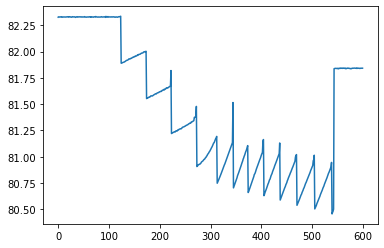

In [13]:
list= {}
for i in range(600):

    y=strip_background(series.iloc[i,:][(  'coordinates',                'coordinate_y')])
    y=linestripe_df(y)
    display(y.iloc[0,0]-y.iloc[0,-1])
    list[i]= y.iloc[0, 0] - y.iloc[0, -1]
plt.plot(list.keys(),list.values())
plt.show()

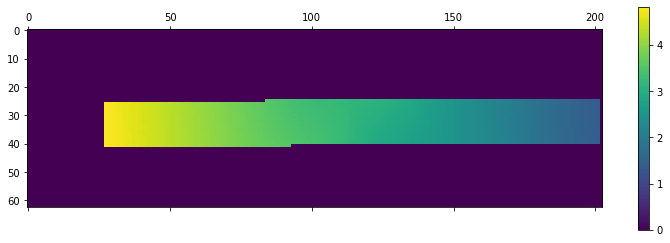

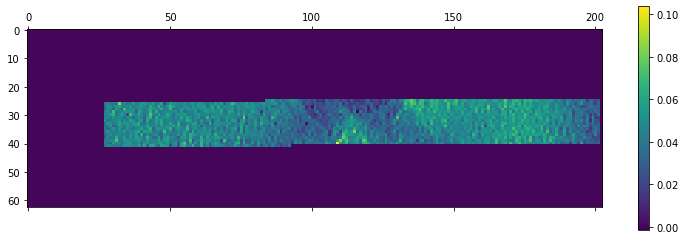

In [40]:
disp=series.iloc[525,:][('displacements', 'displacement_y')]
dp=plt.matshow(disp)
plt.colorbar(dp)
strain=series.iloc[525,:][('strains', 'strain_yy')]
sn=plt.matshow(strain)
plt.colorbar(sn)

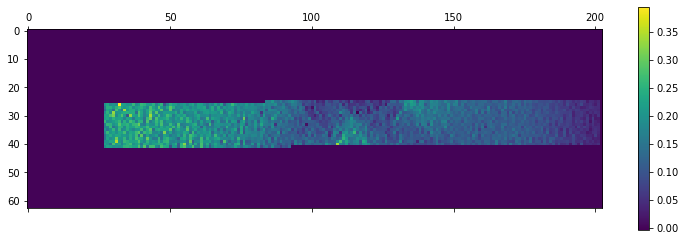

In [42]:
deltal=np.multiply(disp,strain)
dn=plt.matshow(deltal)
plt.colorbar(dn)

0     0.045394
1     0.044936
2     0.045335
3     0.045137
4     0.044763
5     0.044666
6     0.044719
7     0.044820
8     0.044534
9     0.044282
10    0.044028
11    0.044255
12    0.045214
13    0.044990
14    0.045082
15    0.044509
dtype: float64

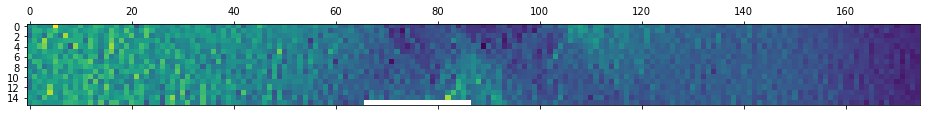

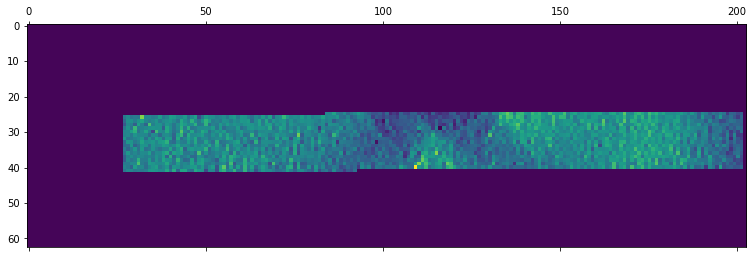

In [67]:
after=strip_background(deltal)
result=linestripe_df(after)
plt.matshow(result)
plt.matshow(series.iloc[525,:][('strains', 'strain_yy')])
fun=strip_background(series.iloc[525,:][('strains', 'strain_yy')])
fun=linestripe_df(fun)
display(fun.mean(axis=1))

<ipython-input-76-03999d772d72>:6: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  res=plt.matshow(np.subtract(_525,_520))


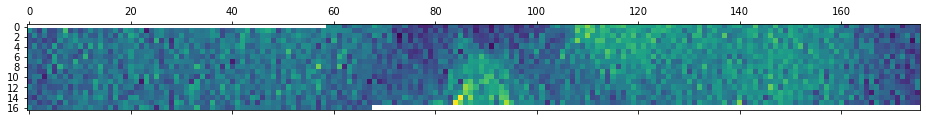

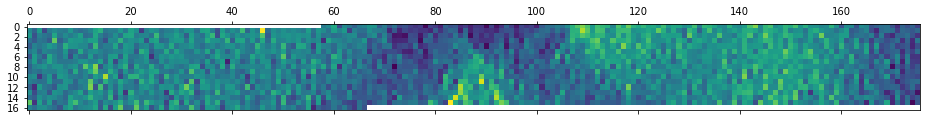

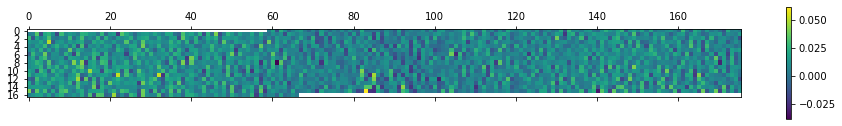

In [76]:
_520=strip_background(series.iloc[450,:][('strains', 'strain_yy')]).iloc[:,:-1]
_525=strip_background(series.iloc[500,:][('strains', 'strain_yy')]).iloc[:,:]
#display(_520,_525)
plt.matshow(_520)
plt.matshow(_525)
res=plt.matshow(np.subtract(_525,_520))
plt.colorbar(res)

In [ ]:

display('good message')